<a id='title'></a>
<div style='background-color: rgba(0, 100, 200, .1)'>
<b><i><h1 style='text-align:center ; padding-top:5px'>
    RepoLingo
</h1></i></b>
<i><h5 style='text-align:center ; padding-bottom:5px'>
    Do You Read Me?
</h5></i></div>
    <li><a href='#imports'>Imports</a>
    <li><a href='#acquire'>Acquire</a>
    <li><a href='#prepare'>Prepare</a>
    <li><a href='#explore'>Explore</a>
    <li><a href='#model'>Modeling</a>
    <li><a href='#conclusion'>Conclusion</a>
    </li>

## Overview

Utilizing Web-Scraping techniques on Github NLP repository's README that have the majority of the code as Python or HTML, we will create a classification model that accurately predicts the predominant coding language used within each repository.  This is important to see if there is any pattern of vocabulary usage that tends to dictate the predominant coding language.

---

<a id='imports'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Imports
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

| Python Library | Version | Usage |
| ----- | ----- | ----- |
| numpy | 1.21.5 | Vectorization |
| pandas | 1.4.4 | Dataframing |
| matplotlib | 3.5.2 | Visualization |
| seaborn | 0.11.2 | Visualization |
| wordcloud | 1.9.1.1 | Visualization |
| bs4 | 4.11.1 | NLP |
| requests | 2.28.1 | NLP |
| regex | 2022.7.9 | NLP |
| nltk | 3.7 | NLP |
| unicodedata | X | NLP |
| sklearn | 1.0.2 | Stats, Metrics, Modeling |

In [1]:
# Import to maintain cleanliness of file
import final as f
import modeling as m
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

---

<a id='acquire'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Acquire
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

#### <b>Data Description:</b>
- Web-scraped data from 500 NLP related Github repositories that contain the README contents and predominant code language (Python or HTML) for each repository.  The target variable is the predominant coding language of each repository (Python or HTML).

<b>Data Dictionary:</b>

| Feature Name | Data Type | Description | Example |
| ----- | ----- | ----- | ----- |
| repo | object | Name of Repository | 'huggingface/transformers' |
| language | object | Predominant coding language of Repository | 'Python' |
| readme_contents | object | Contents of Repository's README file | 'Transformers provides thousands of pretrained...' |
| cleaned_readme_contents | object | Cleaned version  of contents of Repository's README file | 'transformers provides thousands pretrained...' |

In [2]:
# Using the final.py file...
# Get the shape of the vanilla dataframe
raw_data = f.vanilla()
raw_data.shape

(500, 4)

<b>Raw Data Shape:</b>

- Columns: 4
- Rows: 500

---

<a id='prepare'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Prepare
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

#### <b>Missing Values:</b> 
- There were no missing values in the dataset.

#### <b>Data Preparation:</b>
- Removed extra whitespace and puncuation 
- Converted the text to lowercase 
- Tokenized the text
- Lemmatize the words to get the root word
- Remove stop-words (the, and, it, etc. and some coding language)

#### <b>Post-Explore Preparation:</b>
- Removed 1 outlier repository readme that contained over 2000 hyperlinks
- Changed all text starting with 'srchttps...' to 'srchttp_link'
- Removed all instances of '&#9;'

#### <b>Train, Validate Test Split:</b>
- We split our data in order to prevent overfitting with percentages:
- 70% training
- 20% validate
- 10% test

In [3]:
# Using the final.py file...
# Get the shape of the prepared dataframe
prepped_df = f.prepare()
prepped_df.shape

(499, 4)

<b>Prepared Data Shape:</b>

- Columns: 4
- Rows: 499

---

#### We found there was one repository containing over 2000 hyperlinks. Below is a visual of hyperlink frequency per repo before and after removing this one outlier repo.

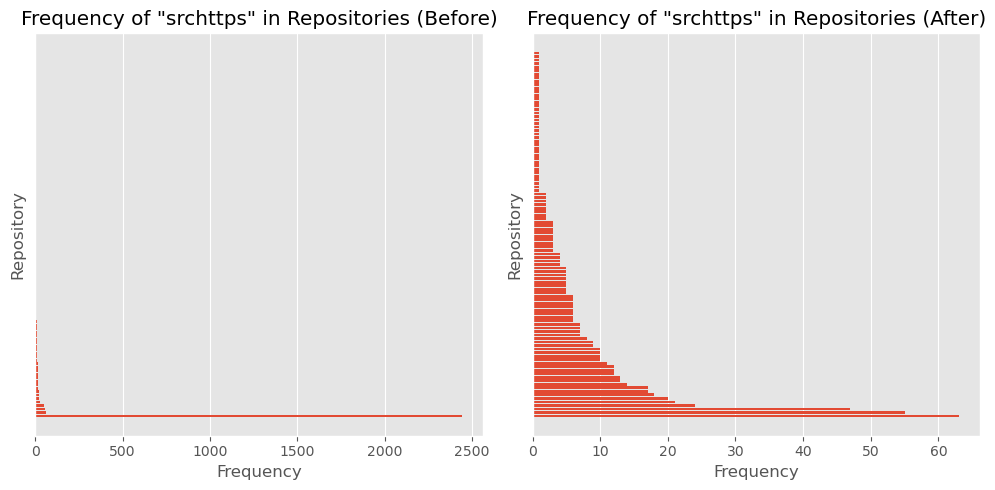

In [4]:
# Demostrate the outlier repository to reinforce it's removal
# Show the visual of the distribution of 'srchttps' before and after for all repositories
f.visual1(raw_data, prepped_df)

In [5]:
# split the data into train, validate and test datasets
train, validate, test = f.train_split(prepped_df)

In [6]:
# create groups for words in either python or html language
python_text, html_text = f.get_words(train)

---

<a id='explore'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Explore
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

#### The questions that we asked of our data were:
- Is there unique terminology used more frequently for Python and HTML?
- Does one programming language have a higher sentiment score on average than the other?
- Are there 2-word combinations that are used more in Python than HTML and vice versa?
- Do hyperlinks (text begining with 'http') occur more frequently in Python or in HTML readmes?

---

## <b> Question 1: </b> 
Is there unique terminology used more frequently for Python and HTML?

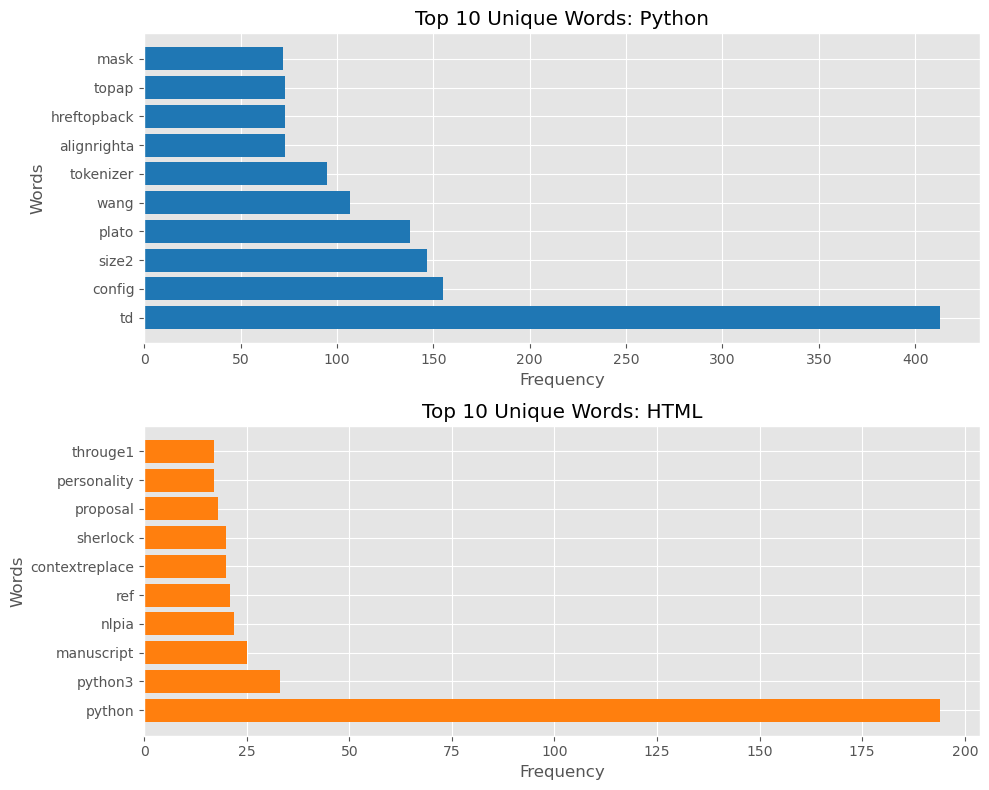

In [7]:
# Using the final.py file...
# Demonstrate top unique words for each repository group
# Get the distribution of unique words for both Python and HTML repositories
f.visual2(train, python_text, html_text)

### <b> Answer to Question 1: </b> 
As demonstrated above, there does appear to be a plethora of unique words specific to each repository coding language.

#### <b> Takeaway: </b> 
Python and HTML Github NLP repositories have unique words used in each coding group.

---

## <b> Question 2: </b> 
Does one programming language have a higher sentiment score on average than the other?

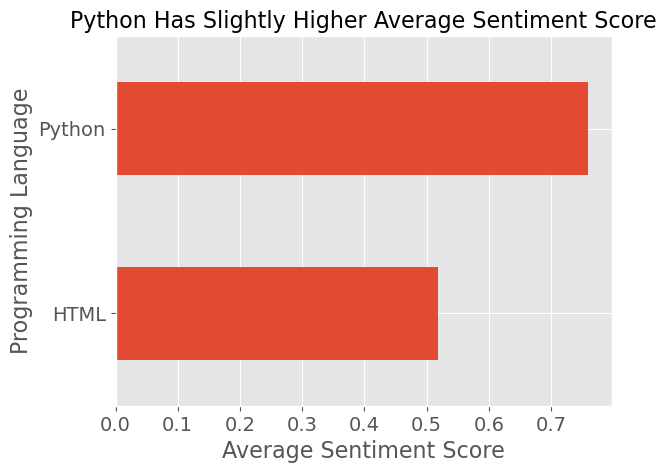

In [8]:
# Using the final.py file...
# Show a plot of the average sentiment score for each programming language
f.visual3(train)

### <b> Answer to Question 2: </b> 
Both Python and HTML have a positive average sentiment score, but Python has a slightly higher average score.

#### <b> Takeaway: </b> 
Readme wording is generally positive, but Python had a slightly higher average score

---

## <b> Question 3: </b> 
Are there 2-word combinations that are used more in Python than HTML and vice versa?

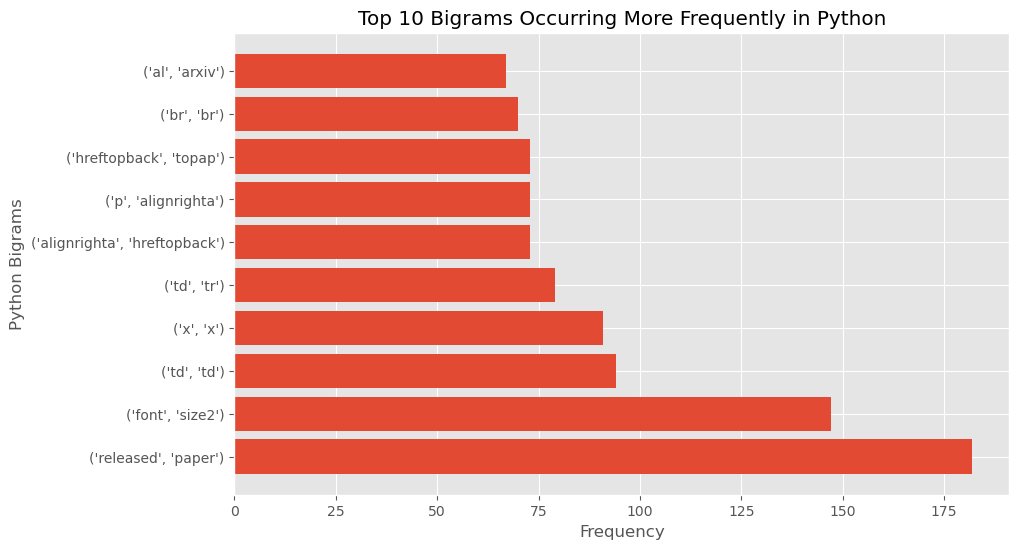

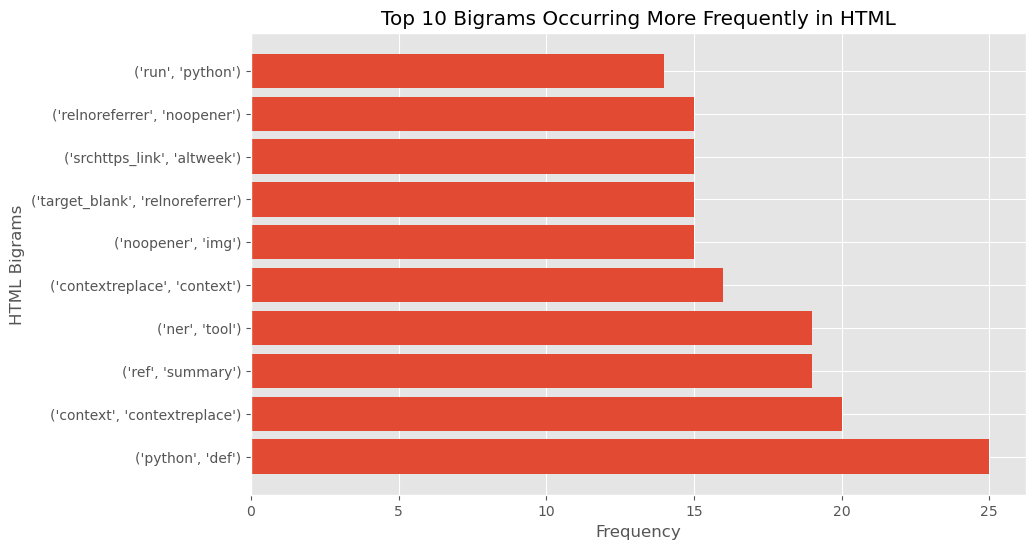

In [9]:
# Using the final.py file...
# Demonstrate bigrams (2-word combinations) that occur the most in each group
# Get the distribution of bigrams for both Python and HTML
f.visual4(train, python_text, html_text)

### <b> Answer to Question 3: </b> 
As demonstrated above, it appears that not only single words, but combinations of 2-words, or bigrams, appear to be unique as well as being the most frequent for both Python and HTML repositories.

#### <b> Takeaway: </b> 
Whether it's 1-word or 2-word combinations, the most frequent words for either Python or HTML also appear to be unique to those respective repository coding language group.

---

## <b> Question 4: </b> 
Do hyperlinks (text begining with 'http') occur more in Python or in HTML readmes?

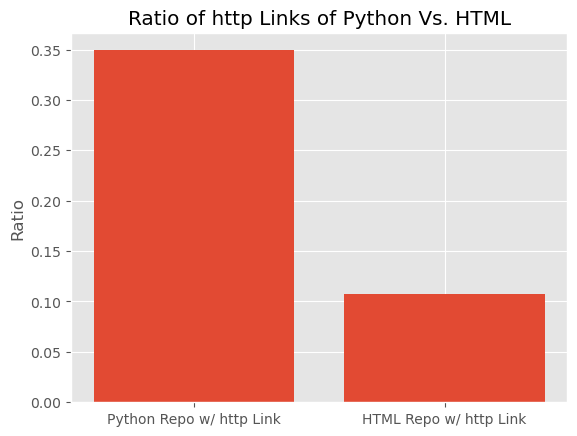

In [10]:
# Using the final.py file...
# Demonstrate the ratio of Python repositories with at least one http word
# divided by all Python repositories and do the same with the HTML group
# Show the distribution of repositories with http words for each language
f.visual5(train)

### <b> Is this result statistically valid?</b> 
- <b>H$_0$:</b> HTTP words occur equally across both Python and HTML repositories.
- <b>H$_a$:</b> HTTP words <b>DO NOT</b> occur equally across both Python and HTML repositories.
- We will be using a chi-squared test
- α = 0.05

In [11]:
# Using the final.py file...
# Demonstrate whether or not http words are statistically significant
# Get the chi2_contingency stat test of hyperlink frequency vs. language
f.stat1(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000064
Chi-Squared-Value: 24.79972519


#### We are able to reject the null hypothesis, and conclude that hyperlinks are more frequently used in Python readmes

### <b> Answer to Question 4: </b> 
Hyperlinks occur more in Python repositories than HTML repositories.

#### <b> Takeaway: </b> 
Repositories written in predominantly Python tend to have hyperlinks (words begining with http) almost 25% more than that repositories written in HTML.

---

## <b> Exploration Summary</b> 

#### <b>Takeaway:</b>  
Overall there does appear to be unique words as well as unique bigrams that appear more frequently in either Python and HTML repository readmes. Readme wording is generally positive, but Python had a slightly higher average score. It also may appear that Python repositories tends to have a higher frequency of hyperlinks and references as opposed to HTML repositories.

---

<a id='model'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Modeling
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

#### <b>Model Evaluation Metric</b>
- Metric: <b><mark>Accuracy</mark></b>
- There is not greater importance for either Python or HTML predictions, we are looking to maximize the overall correct predictions from our model. Therefore we will evaluate models on their accuracy scores

#### <b>Features For Modeling:</b> 
- After cleaning, lemmatizing and removing the outlier repository, we will continue with modeling using the remaining words in the training dataset.

## <b> Baseline</b> 
- The baseline model represents the mode (most frequent value) for the dataset, which is Python language. 
- The baseline model has a 60% accuracy score.

In [12]:
# Demonstrate the baseline model metrics
m.get_model_baseline(train, 
                     validate)

Model : Baseline
Train accuracy : 0.5989
Validation accuracy : 0.6000
Difference : 0.0011


---

## <b> Models</b> 
We used classification type machine learning models for this project. The model types used were: 
- Decision Tree
- Random Forest
- K-Nearest Neighbors
- Logistic Regression

96 combinations of model, hyperperameter and vectorization methods were used to find the best models

In [13]:
# segment our datasets into X and y groups for modeling use
X_train = train.cleaned_readme_contents
y_train = train.language
X_validate = validate.cleaned_readme_contents
y_validate = validate.language
X_test = test.cleaned_readme_contents
y_test = test.language

### Model 1: 
Decision Tree(max_depth=4), single word TFIDF vectorized

In [14]:
# get a decistion tree with max_depth-4 using single word tfidf vectorization
dt_t_1_4, tfidf_1 = m.get_model_tree_tfidf_1gram_4depth(X_train, 
                                                        X_validate, 
                                                        y_train, 
                                                        y_validate)

Model : Decistion_Tree : TfidfVectorizer : 1gram : 4_max_depth
Train accuracy : 0.8997
Validation accuracy : 0.8900
Difference : -0.0097


---

### Model 2: 
Decision Tree(max_depth=6), single word TFIDF vectorized

In [15]:
# get a decistion tree with max_depth-6 using single word tfidf vectorization
dt_t_1_6, tfidf_1 = m.get_model_tree_tfidf_1gram_6depth(X_train, 
                                                        X_validate, 
                                                        y_train, 
                                                        y_validate)

Model : Decistion_Tree : TfidfVectorizer : 1gram : 6_max_depth
Train accuracy : 0.9427
Validation accuracy : 0.9100
Difference : -0.0327


---

### Model 3: 
Decision Tree(max_depth=4), single word count vectorized

In [16]:
# get a decistion tree with max_depth-4 using single word count vectorization
dt_c_1_4, cv_1 = m.get_model_tree_cv_1gram_4depth(X_train, 
                                                  X_validate, 
                                                  y_train, 
                                                  y_validate)

Model : Decistion_Tree : CountVectorizer : 1gram : 4_max_depth
Train accuracy : 0.8825
Validation accuracy : 0.9100
Difference : 0.0275


---

## <b> Best Model</b> 
Our best model was a Decision Tree model with max depth=4, using single word TFIDF Vectorization. This model had the lowest drop in accuracy between the training and validatation datasets, while also having one of the highest overall accuracy scores.
- Train accuracy : 0.8997
- Validation accuracy : 0.9000
- Difference : 0.0003

In [17]:
# Demonstrate the performance of the best model on the test dataset
m.get_model_test_tfifd_1(X_test, 
                         y_test, 
                         dt_t_1_4, 
                         tfidf_1)

Test Dataset
Model : Decistion_Tree : TfidfVectorizer : 1gram : 4_max_depth
Test accuracy : 0.8200


### <b>Modeling Wrap </b>
Our best model had an accuracy of 80% on our test dataset. This is an 20% improvement over our baseline.

---

<a id='conclusion'></a>
<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Conclusion
</h1></i></b>
    <li><a href='#title'>Back to Top</a></li>

### Summary
- Overall there does appear to be unique words as well as unique bigrams that appear more frequently in either Python and HTML repository readmes. 
- Readme wording is generally positive, but Python had a slightly higher average sentiment score. 
- It also may appear that Python repositories tends to have a higher frequency of hyperlinks and references as opposed to HTML repositories.
- Our best model was a Decision Tree model with an accuracy of 80% on our test dataset, which is 20% higher than our baseline model.

### Recommendations
- If looking to make a model to determine repository programming language, the number of hyperlinks in the readme might help make a determination.

### Next Steps
- If given more time we would filter out more html tags from the readme text as a part of the preparation steps
- We would also like to add more programming languages to our dataset